Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

from scipy.io import wavfile

from numpy.fft import fft


Generate waves

In [3]:
def gen_wave (freq, amp, T, sr):

    time = np.arange(0,T,1/sr)
    
    X = amp*np.sin(2*np.pi*freq*time)
    
    return time,X

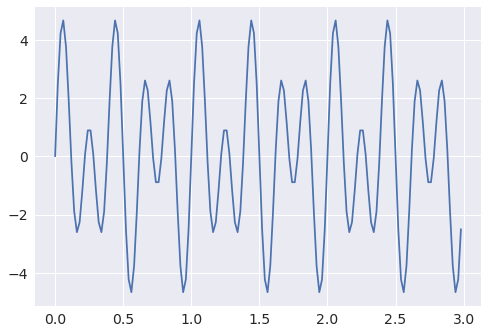

In [24]:
sr=50 #in Hz

x,y   = gen_wave(3,2,3,sr)
x,y2   = gen_wave(5,3,3,sr)

y = y + y2

plt.plot(x, y)

In [25]:
n = len(y) 
p = fft(y) # take the fourier transform 

mag = np.sqrt(p.real**2 + p.imag**2)

mag = mag * 2 / n

mag = mag[0:math.ceil((n)/2.0)]

x = np.arange(0, len(mag), 1.0) * (sr / n)

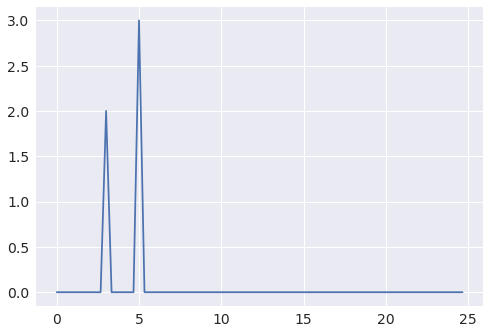

In [28]:
plt.plot(x, mag)

<BarContainer object of 75 artists>

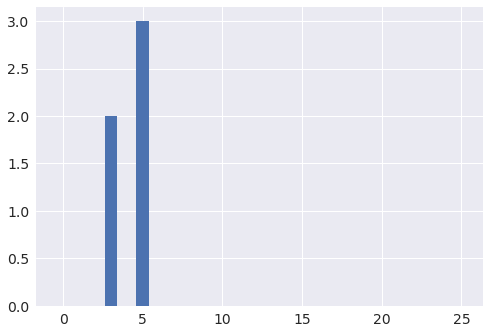

In [29]:
plt.bar(x, mag)

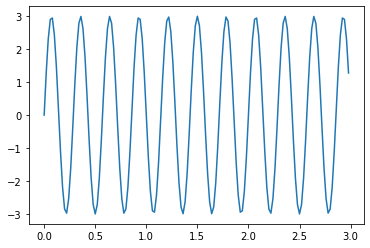

In [59]:
x,y3   = gen_wave(3.5,3,3,sr)
plt.plot(x, y3)

In [63]:
n = len(y) 
p = fft(y3) # take the fourier transform 

mag = np.sqrt(p.real**2 + p.imag**2)

mag = mag * 2 / n

mag = mag[0:math.ceil((n)/2.0)]

x = np.arange(0, len(mag), 1.0) * (sr / n)

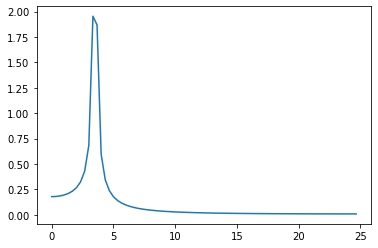

In [64]:
plt.plot(x, mag)

<BarContainer object of 75 artists>

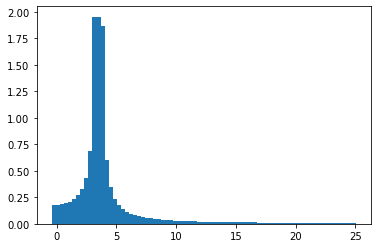

In [65]:
plt.bar(x, mag)

<BarContainer object of 150 artists>

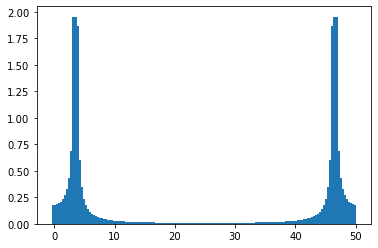

In [66]:
#Full spectrogram

x,y3   = gen_wave(3.5,3,3,sr)

n = len(y) 
p = fft(y3) # take the fourier transform 

mag = np.sqrt(p.real**2 + p.imag**2)

mag = mag * 2 / n

mag = mag[0:math.ceil((n))]

x = np.arange(0, len(mag), 1.0) * (sr / n)

plt.bar(x, mag)

Real Signal

In [28]:
fs, snd = wavfile.read("4 sound.wav")

In [29]:
fs

44100

In [30]:
snd

array([[ 1,  1],
       [ 0,  0],
       [ 0,  0],
       ...,
       [ 0, -1],
       [ 0,  0],
       [ 1, -1]], dtype=int16)

In [31]:
snd.shape

(171454, 2)

In [32]:
snd[:,0]

array([1, 0, 0, ..., 0, 0, 1], dtype=int16)

In [51]:
Ls = snd.shape[0]/fs

print(f'Audio length: {Ls:.2f} seconds')

Audio length: 3.89 seconds


In [33]:
np.max(snd[:,0])

29357

Text(0.5, 0, 'Time (ms)')

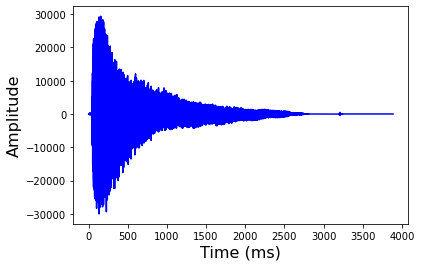

In [36]:
s1 = snd[:,0]
time = np.arange(0, s1.shape[0], 1)
time = (time / fs)*1000
plt.plot(time, s1, color='b')
plt.ylabel('Amplitude', fontsize=16)
plt.xlabel('Time (ms)', fontsize=16)

In [37]:
np.max(snd)/2.**15

0.895904541015625

In [38]:
snd = snd / (2.**15)
s1 = snd[:,0]

In [39]:
s1.shape

(171454,)

In [40]:
time = np.arange(0, s1.shape[0], 1)
time = (time / fs)*1000

In [41]:
time.shape

(171454,)

Text(0.5, 0, 'Time (ms)')

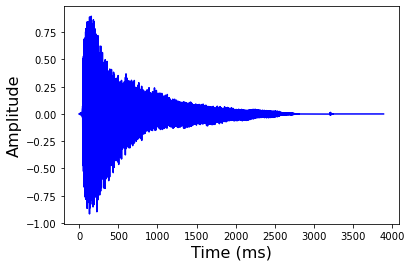

In [42]:
plt.plot(time, s1, color='b')
plt.ylabel('Amplitude', fontsize=16)
plt.xlabel('Time (ms)', fontsize=16)

In [43]:
n = len(s1) 
p = fft(s1) # take the fourier transform 

mag = np.sqrt(p.real**2 + p.imag**2)

mag = mag * 2 / n

mag = mag[0:math.ceil((n)/2.0)]

freq = np.arange(0, len(mag), 1.0) * (fs / n)

Text(0.5, 0, 'Frequency')

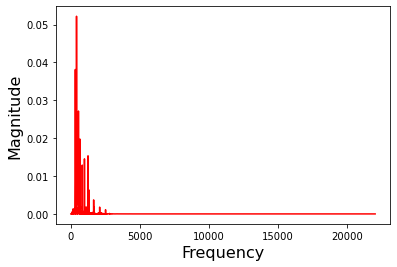

In [44]:
plt.plot(freq, mag, color='r')
plt.ylabel('Magnitude', fontsize=16)
plt.xlabel('Frequency', fontsize=16)

In [45]:
mag

array([1.27442847e-07, 1.56098216e-07, 1.48550445e-07, ...,
       3.09385909e-08, 8.29572968e-08, 3.76380037e-08])